<a href="https://colab.research.google.com/github/alitourani/deep-learning-from-scratch/blob/main/Codes/ML/Linear_Regression_Housing_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Prices Prediction using Machine Learning**

🎯 **Goal:** We want to build a model to predict the price of houses in California. We use Linear Regression for this prediction.

🗄️ **Dataset:** California Housing Prices ([link](https://www.kaggle.com/camnugent/california-housing-prices) - 	
20,640 instances, classified into eight dimensions - More info [here](https://developers.google.com/machine-learning/crash-course/california-housing-data-description))

💡 **Inspiration:** Shreyas3108's [repo](https://github.com/Shreyas3108/house-price-prediction)


**1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**2. Import the Dataset**

In [2]:
# Simply, loading the dataset from SKLearn
dataset = datasets.fetch_california_housing()

# Summary
print('Dataset loaded!')
print('Features covered by the dataset:', dataset.feature_names)
print('Available categories:', dataset.target_names)

# Let's see the data instances
data = dataset.data
data = pd.DataFrame(data, columns=dataset.feature_names)

# Adding category data (0, 1, or 2) to a new column, named 'class'
data['classNumber'] = dataset.target

print('\nThe California Pricing Dataset sample instances:\n')
data.head()

Dataset loaded!
Features covered by the dataset: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Available categories: ['MedHouseVal']

The California Pricing Dataset sample instances:



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,classNumber
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


2.1. Check the statistics of the data

In [3]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,classNumber
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


2.2. Describing the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   classNumber  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**3. Data visualization**

3.1 Simple plots describing the data

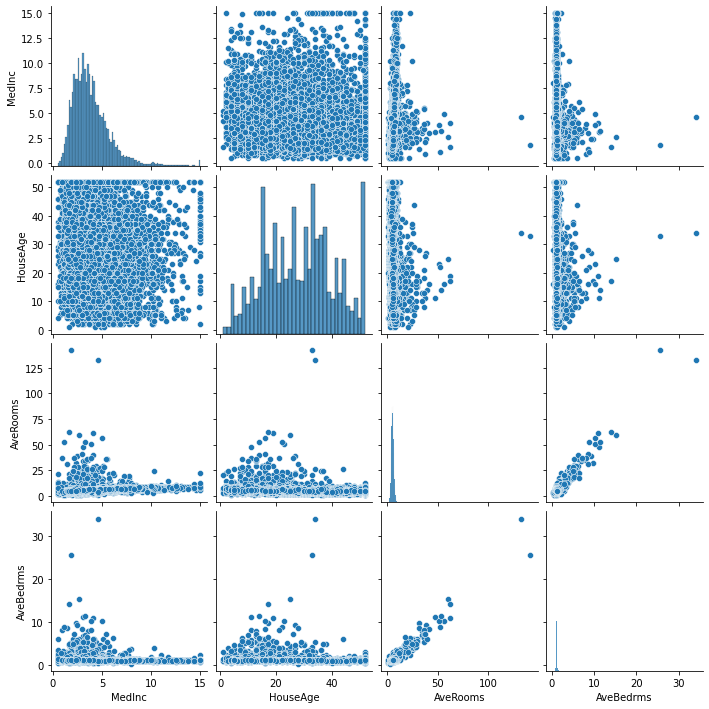

In [7]:
sns.pairplot(data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']])

3.2. Distribution of owners' median incomes

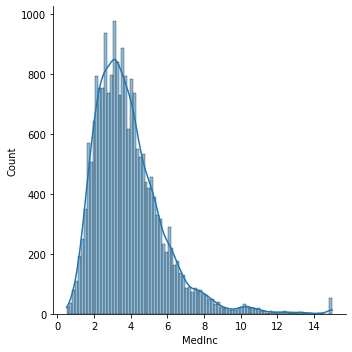

In [12]:
sns.displot(data=data['MedInc'], kde=True)

3.3. Location plotting

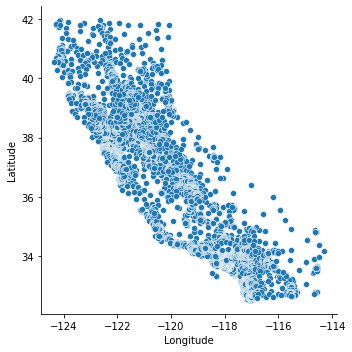

In [13]:
sns.relplot(data=data, x="Longitude", y="Latitude")

3.4. Correlation matrix

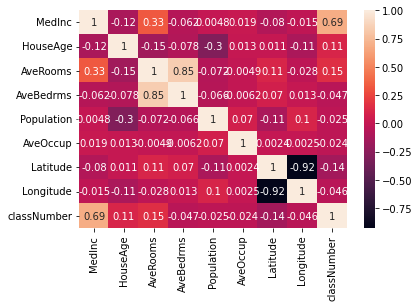

In [16]:
sns.heatmap(data.corr(), annot=True)

**4. Working with Data**

4.1 Splitting training set and test set

In [14]:
# Split parameters
testSize = 0.2
randomState = 2

labels = data['MedInc']
features = data.drop(['MedInc'], axis=1)

featTrain, featTest, labelTrain, labelTest = train_test_split(features, labels, test_size=testSize, random_state=randomState)

# Some summaries
print('The length of train and test data: ', len(featTrain), len(featTest))

The length of train and test data:  16512 4128


4.2 Training Linear Regression

In [19]:
linReg = LinearRegression()
# Fitting the linear model
linReg.fit(featTrain, labelTrain)
# Returning the coefficient of determination of the prediction
score = linReg.score(featTest, labelTest)

print("Score:", score)
print("Coefficients:", linReg.coef_)
print("Intercept:", linReg.intercept_, '\n\n')

coef = pd.DataFrame(linReg.coef_, features.columns, columns=['Coefficient'])
coef

Score: 0.6912089189201098
Coefficients: [-1.35140112e-02  7.97055954e-01 -3.44405324e+00 -3.44814948e-06
  7.09374807e-03 -1.62990635e-01 -1.27830683e-01  7.69712566e-01]
Intercept: -7.3771038830016105 




,Coefficient
HouseAge,-0.013514
AveRooms,0.797056
AveBedrms,-3.444053
Population,-0.000003
AveOccup,0.007094
Latitude,-0.162991
Longitude,-0.127831
classNumber,0.769713


4.3 Making a prediction

In [21]:
predictions = linReg.predict(featTest)

# Meas Square Error (MSE)
mse = mean_squared_error(labelTest, predictions)
print("MSE:", mse)

evalDataFrame = pd.DataFrame([labelTest.values, predictions], index=['Real', 'Predicted'])
evalDataFrame

MSE: 1.1450765942962715


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4088,4089,4090,4091,4092,4093,4094,4095,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127
Real,6.411400,4.184300,1.741100,3.441200,7.819500,5.45700,4.762500,2.270800,3.815000,3.890600,3.062500,4.013200,6.923800,1.505700,5.248600,2.272700,0.933800,6.511600,4.404200,3.802400,2.140600,9.889200,2.825000,2.896400,2.317300,3.270200,4.652000,2.238600,4.226000,2.107800,2.695900,5.312900,5.004900,3.375000,1.881600,4.47320,3.789100,4.597200,1.610300,1.63410,...,1.638900,4.633600,5.279800,4.861800,5.623300,2.699100,1.6728,1.990600,4.51790,2.057700,4.207100,3.852900,7.961100,5.325400,4.037000,1.190300,2.822600,2.397100,1.344800,1.70830,2.925000,4.403300,2.703600,4.26560,3.676900,8.226900,3.753300,1.277800,4.909100,3.976600,3.652300,2.346300,4.694400,3.609100,1.852300,4.817300,2.080000,2.174300,1.60230,4.222700
Predicted,6.527074,4.690512,2.325928,3.966773,8.229437,4.54667,4.646454,1.813186,3.138347,4.291017,4.569783,8.114805,5.613665,2.193396,5.455763,2.467173,0.818039,5.460114,3.915433,3.754524,1.979924,8.619318,3.488712,2.890907,1.784424,2.703107,5.895579,2.358119,3.757434,2.269477,2.796143,4.258387,5.188859,3.745755,1.635738,4.85968,2.722072,2.765036,1.713887,2.01528,...,3.082739,3.782766,5.106131,5.981376,6.073281,3.034346,2.1769,2.637721,4.00104,2.245519,3.520699,4.222326,7.016824,5.404723,3.155153,2.606084,2.866404,2.576464,1.986381,1.38753,3.062299,5.898693,2.581107,4.32308,4.915248,7.647167,3.690434,1.320933,4.492984,4.207364,3.762649,3.002951,3.622876,3.266304,2.291751,4.037417,2.297794,2.417158,1.86134,4.371208


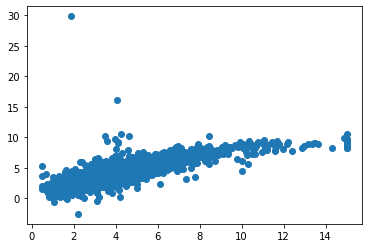

In [22]:
plt.scatter(labelTest, predictions)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


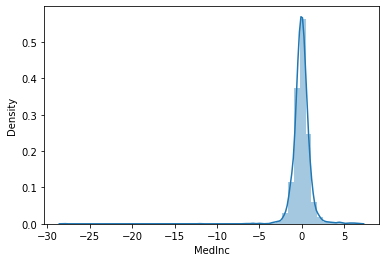

In [24]:
sns.distplot((labelTest - predictions))